# Continuity Equation



We look to solve the continuity equation for a given flow for a one dimensional flow.

$$ \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left(\rho u\right) = 0$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [133]:
# Parameters
L = 1.0         # Length of the domain
T = 1.0         # Total simulation time
Nx = 200        # Number of spatial points
Nt = 800        # Number of time steps
dx = L / (Nx - 1)
dt = T / Nt

In [149]:
# Initial conditions
x = np.linspace(0, L, Nx)
u = 0.8*np.ones(Nx) #np.exp(-(x - 0.5*L)**2 / 0.1)             # Velocity
rho = np.exp(-(x-0.1*L)**2 /0.001)
#rho = np.zeros(Nx)       # Example initial density profile
#rho[:10] = 2
#rho[10:] = 0.5

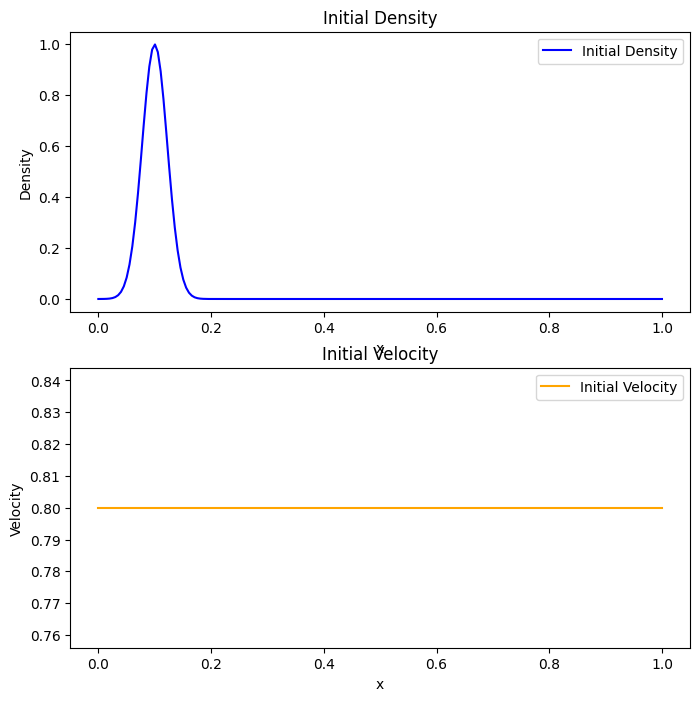

In [150]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(x, rho, label='Initial Density', color='blue')
axs[0].set_title('Initial Density')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Density')
axs[0].legend()

axs[1].plot(x, u, label='Initial Velocity', color='orange')
axs[1].set_title('Initial Velocity')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Velocity')
axs[1].legend()

### FCT Algorithm

In [151]:
eps = np.zeros(Nx-1)
eps[:] = (u[1:] + u[:-1]) * dt / (2*dx)
nu = 0.5 * np.abs(eps) +0.15

In [152]:
# Generate Matrix
import scipy.sparse as sp
d_1 = np.zeros(Nx-1)
d_2 = np.zeros(Nx-1)
d_p = np.ones(Nx)
d_1[1:] = nu[1:] - 0.5*eps[1:]
d_2[:-1] = nu[:-1] + 0.5*eps[:-1]
d_p[1:-1] = 1 - 0.5*(eps[1:] - eps[:-1]) - nu[:-1] - nu[1:]
M = sp.diags([d_2, d_p, d_1], offsets=[-1, 0, 1], shape = (Nx,Nx), format='csr')

In [153]:
rho_tilde = np.zeros(Nx)
mu = nu - 0.5*np.abs(eps)
solution = np.zeros((rho.shape[0], Nt+1))
solution[:, 0] = rho[:]

for i in range(1, Nt+1):
    rho_tilde = M@solution[:,i-1]
    f_ad = mu*(rho_tilde[1:] - rho_tilde[:-1])
    s = np.sign(rho_tilde[1:] - rho_tilde[:-1])
    aux = np.zeros(Nx-1)
    aux[:-1] = (rho_tilde[2:] - rho_tilde[1:-1])
    f_cor = s * np.maximum(0, np.minimum(s*aux, np.abs(f_ad), s*(rho_tilde[1:] - rho_tilde[:-1])))
    solution[1:-1, i] = rho_tilde[1:-1] - f_cor[1:] + f_cor[:-1]

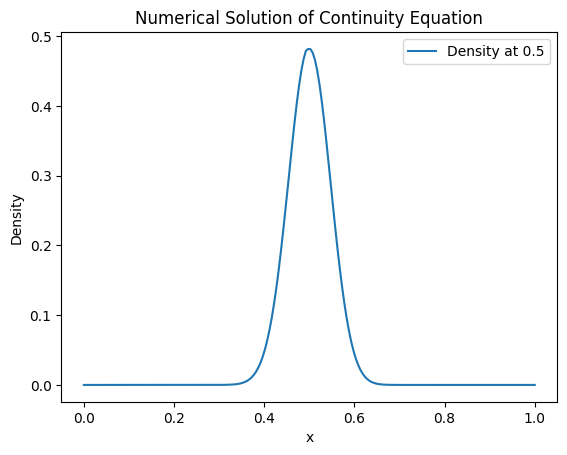

In [157]:
idx = 400
plt.plot(x, solution[:,idx], label=f'Density at {T * idx/Nt}')
plt.title('Numerical Solution of Continuity Equation')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [156]:
sum = 0
for i in range(Nx):
    sum += dx*solution[i, 1]
print(sum)

0.05604960871036842
